In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset= pd.read_csv('data.csv')
dataset.head()

#benign is represented by 0 in the data
#malignant is represented by 1 in the data

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,sy11etry_1ean,fractal_di1ension_1ean,radius_se,texture_se,peri1eter_se,area_se,s1oothness_se,co1pactness_se,concavity_se,concave points_se,sy11etry_se,fractal_di1ension_se,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#HANDLING CATEGORICAL DATA

In [4]:
dataset=dataset.drop("id",1)

import pandas as pd 
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('data.csv') 
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[4.100e+01 1.000e+00 1.799e+01 ... 7.119e-01 2.654e-01 4.601e-01]
 [4.200e+01 1.000e+00 2.057e+01 ... 2.416e-01 1.860e-01 2.750e-01]
 [4.880e+02 1.000e+00 1.969e+01 ... 4.504e-01 2.430e-01 3.613e-01]
 ...
 [3.830e+02 1.000e+00 1.660e+01 ... 3.403e-01 1.418e-01 2.218e-01]
 [3.840e+02 1.000e+00 2.060e+01 ... 9.387e-01 2.650e-01 4.087e-01]
 [4.000e+01 0.000e+00 7.760e+00 ... 0.000e+00 0.000e+00 2.871e-01]]


In [5]:
x = dataset[['radius_1ean','fractal_di1ension_worst']]
#separate the other attributes from the predicting attribute

In [6]:
y = dataset[['diagnosis']]
#separte the predicting attribute into Y for model training 

#GRAPHS

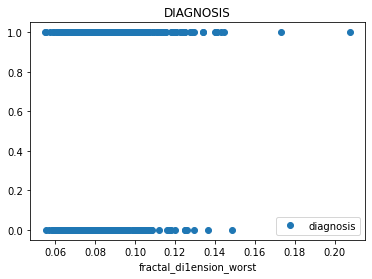

In [7]:
dataset.plot(x='fractal_di1ension_worst', y='diagnosis' , style='o')
plt.title('DIAGNOSIS')
plt.show()

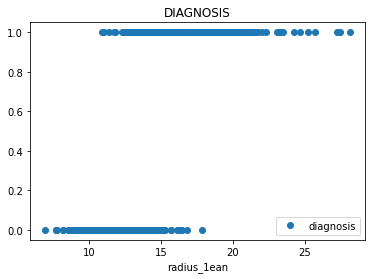

In [8]:
dataset.plot(x='radius_1ean', y='diagnosis' , style='o')
plt.title('DIAGNOSIS')
plt.show()

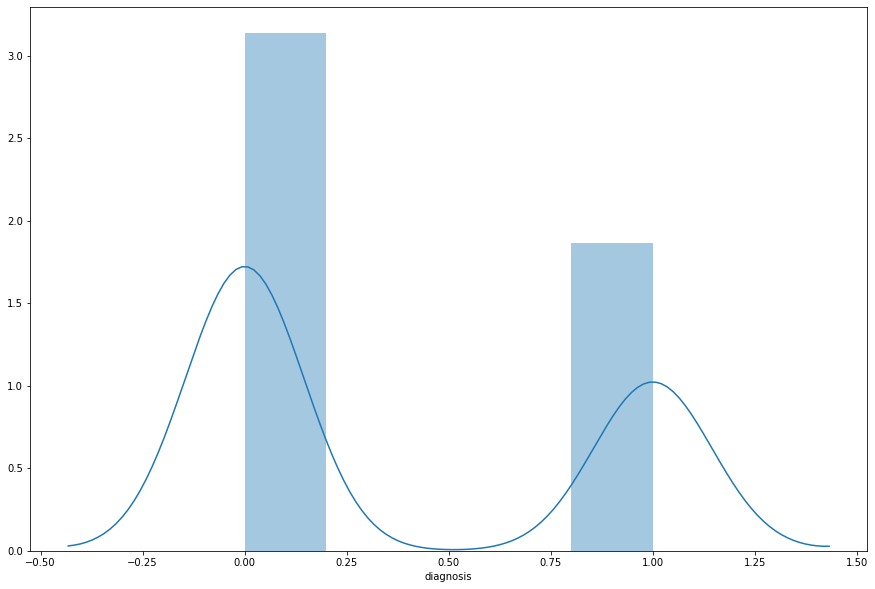

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['diagnosis'])
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [11]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.1452506  0.14167651]
 [0.18074684 0.14154532]
 [0.43348005 0.09891119]
 [0.24605992 0.1227863 ]
 [0.2493729  0.17703004]
 [0.29812107 0.11911321]
 [0.22523546 0.07765971]
 [0.26925079 0.09077791]
 [0.34260968 0.58743277]
 [0.20299115 0.24340811]
 [0.62563302 0.13957759]
 [0.21955606 0.24701561]
 [0.34828908 0.03725567]
 [0.20393772 0.16515807]
 [0.15518955 0.26072412]
 [0.18358654 0.07136298]
 [0.521984   0.13911846]
 [0.14667045 0.14384101]
 [0.2943348  0.1889676 ]
 [0.29007525 0.34474616]
 [0.204411   0.48970222]
 [0.2157698  0.12659058]
 [0.36722041 0.0952381 ]
 [0.38189219 0.09510691]
 [0.76809125 0.20812016]
 [0.16702163 0.23101141]
 [0.25363245 0.13695396]
 [0.30995314 0.11065197]
 [0.59676274 0.24393283]
 [0.23044157 0.09858323]
 [0.20062473 0.06677161]
 [0.62232003 0.07431457]
 [0.31279284 0.04978355]
 [0.45951063 0.13898728]
 [0.24038052 0.16915912]
 [0.32604477 0.10553588]
 [0.26404468 0.1104552 ]
 [0.34450282 0.34868162]
 [0.09692839 0.40968123]
 [0.30664016 0.20733307]


#ALGORITHM

In [12]:
model =LogisticRegression()
#loading the model constructor

#FITTING OF TRAINING DATA

In [13]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print('Intercept is :',model.intercept_)

Intercept is : [-14.65524534]


In [15]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[0.9842272  1.12422973]]


#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [16]:
predictions = model.predict(x_test)

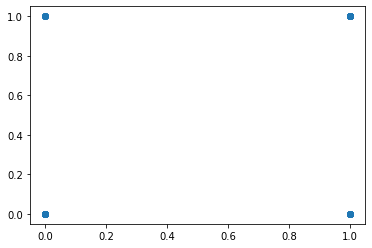

In [17]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !!it is almost forming a linear line with less deviation

#EVALUATION

In [19]:

print(metrics.accuracy_score(y_test, predictions))

0.8947368421052632


#SAVING THE MODEL USING PICKLE LIBRARY

In [20]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [21]:
y_train = y_train[0:74]

In [22]:
from sklearn.metrics import confusion_matrix

predictions=predictions[0:74]

results =confusion_matrix(y_train, predictions)
print(results)

[[35 19]
 [13  7]]


Precision, Recall, Support, Fscore

In [23]:
import numpy
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_train, predictions, average='macro')

(0.49919871794871795, 0.49907407407407406, 0.49531116794543895, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [24]:
y_test=y_test[0:74]

results =confusion_matrix(y_test, predictions)
print(results)

[[41  2]
 [ 7 24]]


Precision, Recall, Support, Fscore

In [25]:
import numpy
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_test, predictions, average='macro')

(0.8886217948717949, 0.8638409602400601, 0.8716020821283978, None)